In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [2]:
# Parameters for distributions
p_mu = -1
q_mu = 1
var = 1
sigma = math.sqrt(var)

# set of x and distributions
x = np.linspace(-4, 4, 100)
p = lambda x: stats.norm.pdf(x, p_mu, sigma)
q = lambda x: stats.norm.pdf(x, q_mu, sigma)
pq_over_2 = lambda x: (p(x) + q(x)) / 2

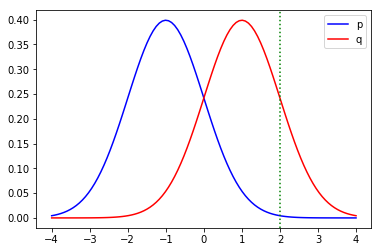

In [3]:
# Plot p and q
fig = plt.figure()
plt.plot(x, p(x), label="p", color="b")
plt.plot(x, q(x), label="q", color="r")
plt.axvline(x=2, linestyle="dotted", color="g")
plt.legend()

plt.savefig("img/two_gaussians.png")
plt.show()

In [4]:
def KLD(p, q, x):
    return p(x) * np.log(p(x) / q(x))

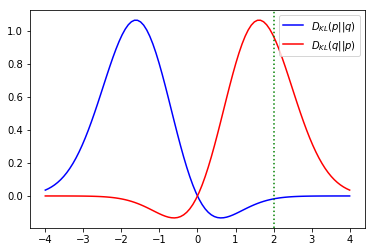

In [5]:
# Plot KL(p,q) and KL(q,p)
fig = plt.figure()
plt.plot(x, KLD(p, q, x), label="$D_{KL}(p || q)$", color="b")
plt.plot(x, KLD(q, p, x), label="$D_{KL}(q || p)$", color="r")
plt.axvline(x=2, linestyle="dotted", color="g")
plt.legend(loc='upper right')

plt.savefig("img/kld.png")
plt.show()

In [6]:
def JSD(p, q, x):
    pq_over_2 = lambda y: (p(y) + q(y)) * 0.5
    kldp = KLD(p, pq_over_2, x)
    kldq = KLD(q, pq_over_2, x)
    jsd = 0.5 * kldp + 0.5 * kldq
    return jsd

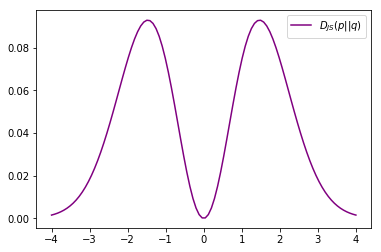

In [7]:
fig = plt.figure()
plt.plot(x, JSD(p, q, x), label="$D_{JS}(p || q)$", color="purple")
plt.legend(loc='upper right')

plt.savefig("img/jsd.png")
plt.show()

In [45]:
# New parameters for gradients
x = np.linspace(-5, 14, 400)
p_mu = 0
q1_mu = 5
q2_mu = 7
q3_mu = 9
var = 1
sigma = math.sqrt(var)


p  = lambda x: stats.norm.pdf(x, p_mu , sigma)
q1 = lambda x: stats.norm.pdf(x, q1_mu, sigma)
q2 = lambda x: stats.norm.pdf(x, q2_mu, sigma)
q3 = lambda x: stats.norm.pdf(x, q3_mu, sigma)

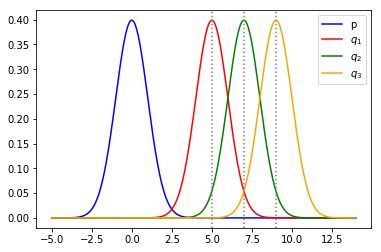

In [47]:
# Plot gaussians
fig = plt.figure()
plt.plot(x, p(x), label="p", color="b")
plt.plot(x, q1(x), label="$q_1$", color="r")
plt.plot(x, q2(x), label="$q_2$", color="g")
plt.plot(x, q3(x), label="$q_3$", color="orange")

plt.axvline(x=q1_mu, linestyle="dotted", color="grey")
plt.axvline(x=q2_mu, linestyle="dotted", color="grey")
plt.axvline(x=q3_mu, linestyle="dotted", color="grey")

plt.legend()

plt.savefig("img/four_gaussians.png")
plt.show()

In [48]:
gaussian_at_x = lambda x : stats.norm.pdf(x, x, sigma)

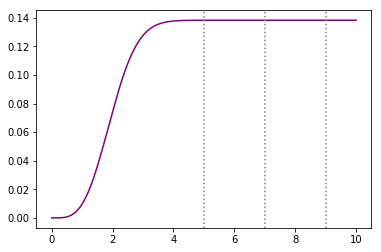

In [51]:
fig = plt.figure()

x = np.linspace(0, 10, 400)
plt.plot(x, JSD(p, gaussian_at_x, x), color="purple")

plt.axvline(x=q1_mu, linestyle="dotted", color="grey")
plt.axvline(x=q2_mu, linestyle="dotted", color="grey")
plt.axvline(x=q3_mu, linestyle="dotted", color="grey")

plt.savefig("img/diminishing_gradient.png")
plt.show()